In [6]:
import cv2
import numpy as np

# Load the video file
video_path = r"E:\7th Sem\Image and Video Analytics\sanjay_walking.mp4"  # Use raw string for Windows path
cap = cv2.VideoCapture(video_path)

# Load pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define parameters for tracking
person_color = (0, 255, 0)  # Bounding box color for person
font = cv2.FONT_HERSHEY_SIMPLEX

# Define the output video file and codec
output_path = r"E:\7th Sem\Image and Video Analytics\sanjay_output.mp4"  # Specify the output path

# Get the frame width, height, and frame rate from the original video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))

# Initialize VideoWriter to save the video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Using mp4v codec for .mp4 file
out = cv2.VideoWriter(output_path, fourcc, frame_rate, (frame_width, frame_height))

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Loop through all detected faces
    for (x, y, w, h) in faces:
        # Draw bounding box around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), person_color, 2)
        # Label the face as "Sanjay"
        cv2.putText(frame, "Sanjay", (x, y - 10), font, 0.6, person_color, 2)

    # Write the processed frame to the output video file
    out.write(frame)

    # Display the frame with bounding boxes and labels
    cv2.imshow("Tracking", frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()


Error: Failed to read frame or end of video.


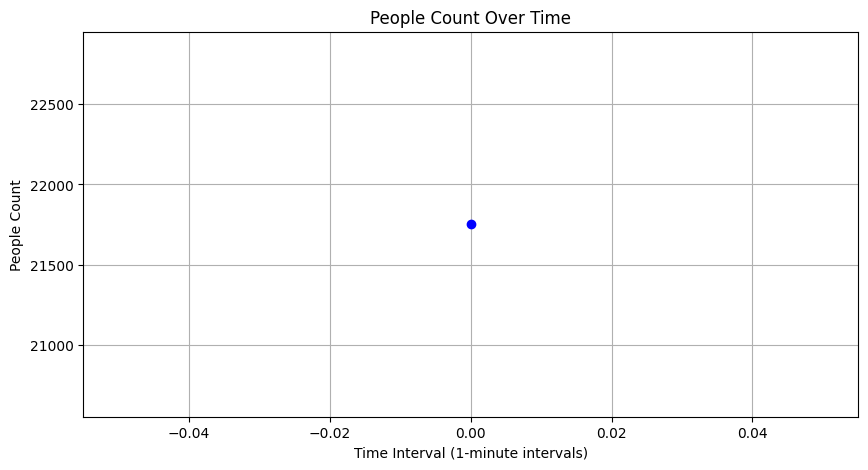

The peak shopping duration is at interval 0 with 21753 people.


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the video file
video_path = "E:\\7th Sem\\Image and Video Analytics\\marathon time lapse.mp4"  # Use raw string for Windows path
cap = cv2.VideoCapture(video_path)

# Check if video is opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Initialize background subtractor with more sensitivity
back_sub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=30, detectShadows=True)  # Reduced varThreshold for sensitivity

# Variables to track people count
frame_rate = cap.get(cv2.CAP_PROP_FPS)
interval_duration = 1 * 60  # 1 minute in seconds for testing
frames_per_interval = int(interval_duration * frame_rate)

people_counts = defaultdict(int)  # Stores counts for each interval
interval_index = 0
frame_count = 0

# Define some parameters for filtering
min_contour_area = 500  # Minimum contour area to avoid detecting too small objects like trees
max_contour_aspect_ratio = 2  # Maximum aspect ratio of bounding box (People tend to have aspect ratio ~1:2)
min_contour_aspect_ratio = 0.5  # Minimum aspect ratio to filter out too wide or too narrow shapes

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to read frame or end of video.")
        break

    # Apply background subtraction
    fg_mask = back_sub.apply(frame)
    
    # Threshold to binary (increase threshold value to make detection more sensitive)
    _, fg_mask = cv2.threshold(fg_mask, 180, 255, cv2.THRESH_BINARY)
    
    # Apply morphological operations to dilate the detected areas (helps with small contours)
    fg_mask = cv2.dilate(fg_mask, None, iterations=2)  # Dilation to fill gaps
    
    # Find contours of moving objects
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    people_in_frame = 0

    for cnt in contours:
        if cv2.contourArea(cnt) < min_contour_area:  # Ignore small contours like trees
            continue

        # Get bounding box around the person
        x, y, w, h = cv2.boundingRect(cnt)

        # Aspect ratio filtering to avoid detecting objects that are too wide or tall (e.g., trees, poles)
        aspect_ratio = float(w) / h
        if aspect_ratio < min_contour_aspect_ratio or aspect_ratio > max_contour_aspect_ratio:
            continue

        people_in_frame += 1

        # Draw bounding box
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Count people in current interval
    people_counts[interval_index] += people_in_frame

    # Show frame with bounding boxes
    cv2.imshow("People Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Move to the next interval if necessary
    frame_count += 1
    if frame_count >= frames_per_interval:
        interval_index += 1
        frame_count = 0

# Check if people_counts is empty
if not people_counts:
    print("Error: No people detected.")
else:
    # Plot people counts over time intervals
    intervals = list(people_counts.keys())
    counts = list(people_counts.values())

    plt.figure(figsize=(10, 5))
    plt.plot(intervals, counts, marker='o', color='b')
    plt.title("People Count Over Time")
    plt.xlabel("Time Interval (1-minute intervals)")
    plt.ylabel("People Count")
    plt.grid(True)
    plt.show()

    # Find peak interval
    peak_interval = max(people_counts, key=people_counts.get)
    print(f"The peak shopping duration is at interval {peak_interval} with {people_counts[peak_interval]} people.")
    
cap.release()
cv2.destroyAllWindows()


In [2]:
import cv2
import os

# Set paths for reference image and video
# Use raw string for Windows file paths to avoid issues with backslashes
reference_image_path = r"E:\7th Sem\Image and Video Analytics\dawood_ibrahim.png"  # Adjust to correct path
video_path = r"E:\7th Sem\Image and Video Analytics\dawood_ibrahim_cut.mp4"  # Adjust to correct path

# Specify output folder for matched frames and output video
output_folder = r"E:\7th Sem\Image and Video Analytics"  # Adjust to correct path
os.makedirs(output_folder, exist_ok=True)

# Load the reference image and convert it to grayscale
reference_image = cv2.imread(reference_image_path)
if reference_image is None:
    print("Error: Image not found at the specified path.")
    exit()  # Exit if the image is not found
reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect face in the reference image
ref_faces = face_cascade.detectMultiScale(reference_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Ensure there's at least one face detected in the reference image
if len(ref_faces) == 0:
    print("No faces found in the reference image.")
    exit()
else:
    print(f"{len(ref_faces)} face(s) detected in the reference image.")

# Extract the detected face from the reference image (use the largest face)
x, y, w, h = max(ref_faces, key=lambda face: face[2] * face[3])
reference_face = reference_gray[y:y+h, x:x+w]

# Load the video
cap = cv2.VideoCapture(video_path)

# Get video properties (width, height, fps) to save the output video correctly
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Initialize VideoWriter to save the processed video
output_video_path = os.path.join(output_folder, 'output_video.avi')
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for AVI format
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Initialize a frame counter
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the current frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    match_found = False  # Flag to check if any match is found in the current frame

    # Process each detected face in the frame
    for (fx, fy, fw, fh) in faces:
        # Extract the face from the frame
        face_in_frame = gray_frame[fy:fy+fh, fx:fx+fw]

        # Resize the reference face and detected face to the same size for comparison
        resized_reference = cv2.resize(reference_face, (fw, fh))
        match_result = cv2.matchTemplate(face_in_frame, resized_reference, cv2.TM_CCOEFF_NORMED)
        _, match_val, _, _ = cv2.minMaxLoc(match_result)

        # Check if match value exceeds threshold (indicates a match)
        match_threshold = 0.7
        if match_val > match_threshold:
            # Draw a rectangle around the matching face in the frame
            cv2.rectangle(frame, (fx, fy), (fx + fw, fy + fh), (0, 255, 0), 2)
            cv2.putText(frame, f'Match: {match_val:.2f}', (fx, fy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            print(f"Match found in frame {frame_count} with similarity score: {match_val:.2f}")

            match_found = True

    # Write the frame with matched faces to the output video
    out.write(frame)

    # Display only frames with a detected match
    if match_found:
        cv2.imshow('Matching Frame', frame)

    # Break on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and writer, and close windows
cap.release()
out.release()
cv2.destroyAllWindows()

print("Video saved to:", output_video_path)


3 face(s) detected in the reference image.
Match found in frame 117 with similarity score: 0.72
Video saved to: E:\7th Sem\Image and Video Analytics\output_video.avi


In [4]:
import cv2

# Load the video
video_path = "E:/7th Sem/Image and Video Analytics/HD CCTV Camera video 3MP 4MP iProx CCTV HDCCTVCameras.net retail store.mp4"  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the region of interest (ROI) on the left third of the frame
roi_x = 0
roi_y = 0
roi_width = frame_width // 3  # Left third of the frame
roi_height = frame_height

# Background subtraction for motion detection
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50)

# Initialize counters for people entering and exiting
enter_count = 0
exit_count = 0

# Variables to hold movement direction
last_direction = None
direction_threshold = 30  # Minimum movement threshold for counting

# Define video writer to save the output video
output_video_path = "E:/7th Sem/Image and Video Analytics/output_video.mp4"  # Specify output path
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for saving the video
out = cv2.VideoWriter(output_video_path, fourcc, cap.get(cv2.CAP_PROP_FPS), (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Crop the frame to the left third
    left_third_frame = frame[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]

    # Convert the left third frame to grayscale and apply Gaussian blur
    gray_roi = cv2.cvtColor(left_third_frame, cv2.COLOR_BGR2GRAY)
    blurred_roi = cv2.GaussianBlur(gray_roi, (5, 5), 0)

    # Detect motion using background subtraction
    fg_mask = fgbg.apply(blurred_roi)
    _, fg_mask = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)

    # Find contours to identify moving objects
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        # Ignore small contours to avoid noise
        if cv2.contourArea(contour) < 500:
            continue

        # Draw bounding box around detected motion in the left third ROI
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(left_third_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Calculate movement direction (up for entering, down for exiting)
        if last_direction is None:
            last_direction = y
        else:
            direction = y - last_direction
            if abs(direction) > direction_threshold:
                if direction < 0:
                    enter_count += 1
                    print(f"Person entered, Total Entered: {enter_count}")
                elif direction > 0:
                    exit_count += 1
                    print(f"Person exited, Total Exited: {exit_count}")
                last_direction = y

    # Display the frame with ROI and motion highlighted
    cv2.rectangle(frame, (roi_x, roi_y), (roi_x + roi_width, roi_y + roi_height), (255, 0, 0), 2)
    cv2.putText(frame, f"Entered: {enter_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(frame, f"Exited: {exit_count}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Write the processed frame to the output video
    out.write(frame)

    # Display the frame with detection
    cv2.imshow("Shop Entrance", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Final count - Entered: {enter_count}, Exited: {exit_count}")


Person exited, Total Exited: 1
Person entered, Total Entered: 1
Person entered, Total Entered: 2
Person exited, Total Exited: 2
Person entered, Total Entered: 3
Person exited, Total Exited: 3
Person entered, Total Entered: 4
Person exited, Total Exited: 4
Person entered, Total Entered: 5
Person exited, Total Exited: 5
Person entered, Total Entered: 6
Person exited, Total Exited: 6
Person entered, Total Entered: 7
Person exited, Total Exited: 7
Person entered, Total Entered: 8
Person entered, Total Entered: 9
Person exited, Total Exited: 8
Person entered, Total Entered: 10
Person exited, Total Exited: 9
Person entered, Total Entered: 11
Person exited, Total Exited: 10
Person entered, Total Entered: 12
Person exited, Total Exited: 11
Person entered, Total Entered: 13
Person exited, Total Exited: 12
Person entered, Total Entered: 14
Person exited, Total Exited: 13
Person entered, Total Entered: 15
Person exited, Total Exited: 14
Person entered, Total Entered: 16
Person exited, Total Exite

In [4]:
import cv2
import time

# Load the video
video_path = "E:/7th Sem/Image and Video Analytics/task5_BatMan_SpiderMan.mp4"  # Replace with the path to your video file
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the regions of interest (ROI) for Spiderman (left) and Batman (right)
spiderman_roi_top_left = (0, 0)  # Top-left corner of Spiderman ROI (left part of the frame)
spiderman_roi_bottom_right = (frame_width // 2, frame_height)  # Right side of Spiderman ROI

batman_roi_top_left = (frame_width // 2, 0)  # Top-left corner of Batman ROI (right part of the frame)
batman_roi_bottom_right = (frame_width, frame_height)  # Right side of the Batman ROI

# Initialize background subtractor for detecting moving objects
bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50, detectShadows=True)

# Variables to track people and their dwelling times
dwelling_times = {}
person_id_counter = 0
min_distance = 50  # Minimum distance to consider two detections as the same person

# Create a VideoWriter object to save the output video
output_video_path = "output_video_Tracked.avi"  # Path where the output video will be saved
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Spiderman ROI - Left half of the frame
    spiderman_roi_frame = frame[spiderman_roi_top_left[1]:spiderman_roi_bottom_right[1], 
                                spiderman_roi_top_left[0]:spiderman_roi_bottom_right[0]]
    cv2.rectangle(frame, spiderman_roi_top_left, spiderman_roi_bottom_right, (0, 255, 0), 2)

    # Batman ROI - Right half of the frame
    batman_roi_frame = frame[batman_roi_top_left[1]:batman_roi_bottom_right[1], 
                             batman_roi_top_left[0]:batman_roi_bottom_right[0]]
    cv2.rectangle(frame, batman_roi_top_left, batman_roi_bottom_right, (0, 255, 0), 2)

    # Apply background subtraction to both regions (Spiderman and Batman)
    spiderman_fg_mask = bg_subtractor.apply(spiderman_roi_frame)
    batman_fg_mask = bg_subtractor.apply(batman_roi_frame)
    _, spiderman_fg_mask = cv2.threshold(spiderman_fg_mask, 244, 255, cv2.THRESH_BINARY)
    _, batman_fg_mask = cv2.threshold(batman_fg_mask, 244, 255, cv2.THRESH_BINARY)

    # Find contours in the foreground mask for both regions
    spiderman_contours, _ = cv2.findContours(spiderman_fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    batman_contours, _ = cv2.findContours(batman_fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    current_frame_positions = []

    # Process each detected contour for Spiderman
    for contour in spiderman_contours:
        if cv2.contourArea(contour) > 500:  # Filter out small detections
            (x, y, w, h) = cv2.boundingRect(contour)
            spiderman_center = (spiderman_roi_top_left[0] + x + w // 2, spiderman_roi_top_left[1] + y + h // 2)
            current_frame_positions.append(spiderman_center)

            # Check if this detected Spiderman is close to an already-tracked person
            person_id = None
            for pid, info in dwelling_times.items():
                # Calculate the Euclidean distance between current detection and tracked person
                tracked_center = info['last_position']
                distance = ((spiderman_center[0] - tracked_center[0]) ** 2 + (spiderman_center[1] - tracked_center[1]) ** 2) ** 0.5

                if distance < min_distance:
                    person_id = pid
                    break

            # If no matching person is found, assign a new ID
            if person_id is None:
                person_id = person_id_counter
                dwelling_times[person_id] = {
                    "entry_time": time.time(),
                    "dwelling_time": 0,
                    "last_position": spiderman_center
                }
                person_id_counter += 1

            # Update person's position and calculate dwelling time
            dwelling_times[person_id]["last_position"] = spiderman_center
            dwelling_times[person_id]["dwelling_time"] = time.time() - dwelling_times[person_id]["entry_time"]

            # Draw bounding box and labels for Spiderman
            cv2.rectangle(frame, (spiderman_roi_top_left[0] + x, spiderman_roi_top_left[1] + y), 
                          (spiderman_roi_top_left[0] + x + w, spiderman_roi_top_left[1] + y + h), (0, 0, 255), 2)
            cv2.putText(frame, f"Spiderman", (spiderman_center[0], spiderman_center[1] - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            cv2.putText(frame, f"Time: {dwelling_times[person_id]['dwelling_time']:.1f} sec",
                        (spiderman_center[0], spiderman_center[1] + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Process each detected contour for Batman
    for contour in batman_contours:
        if cv2.contourArea(contour) > 500:  # Filter out small detections
            (x, y, w, h) = cv2.boundingRect(contour)
            batman_center = (batman_roi_top_left[0] + x + w // 2, batman_roi_top_left[1] + y + h // 2)
            current_frame_positions.append(batman_center)

            # Check if this detected Batman is close to an already-tracked person
            person_id = None
            for pid, info in dwelling_times.items():
                # Calculate the Euclidean distance between current detection and tracked person
                tracked_center = info['last_position']
                distance = ((batman_center[0] - tracked_center[0]) ** 2 + (batman_center[1] - tracked_center[1]) ** 2) ** 0.5

                if distance < min_distance:
                    person_id = pid
                    break

            # If no matching person is found, assign a new ID
            if person_id is None:
                person_id = person_id_counter
                dwelling_times[person_id] = {
                    "entry_time": time.time(),
                    "dwelling_time": 0,
                    "last_position": batman_center
                }
                person_id_counter += 1

            # Update person's position and calculate dwelling time
            dwelling_times[person_id]["last_position"] = batman_center
            dwelling_times[person_id]["dwelling_time"] = time.time() - dwelling_times[person_id]["entry_time"]

            # Draw bounding box and labels for Batman
            cv2.rectangle(frame, (batman_roi_top_left[0] + x, batman_roi_top_left[1] + y), 
                          (batman_roi_top_left[0] + x + w, batman_roi_top_left[1] + y + h), (0, 0, 255), 2)
            cv2.putText(frame, f"Batman", (batman_center[0], batman_center[1] - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            cv2.putText(frame, f"Time: {dwelling_times[person_id]['dwelling_time']:.1f} sec",
                        (batman_center[0], batman_center[1] + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Display the frame with annotations
    cv2.imshow("Dwelling Time Tracking", frame)

    # Save the frame to the output video
    out.write(frame)

    # Break if 'q' is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

# Print total dwelling time for each person tracked
print("Dwelling Times:")
for pid, times in dwelling_times.items():
    print(f"Person {pid}: {times['dwelling_time']:.2f} seconds")

Dwelling Times:
Person 0: 36.53 seconds
Person 1: 34.73 seconds
Person 2: 33.51 seconds
Person 3: 60.36 seconds
Person 4: 29.19 seconds
Person 5: 56.00 seconds
Person 6: 12.56 seconds
Person 7: 55.41 seconds
Person 8: 55.41 seconds
Person 9: 51.73 seconds
Person 10: 29.89 seconds
Person 11: 55.77 seconds
Person 12: 11.59 seconds
Person 13: 0.00 seconds
Person 14: 50.36 seconds
Person 15: 33.56 seconds
Person 16: 34.96 seconds
Person 17: 51.08 seconds
Person 18: 50.10 seconds
Person 19: 44.42 seconds
Person 20: 45.19 seconds
Person 21: 18.90 seconds
Person 22: 43.39 seconds
Person 23: 40.35 seconds
Person 24: 0.00 seconds
Person 25: 5.17 seconds
Person 26: 2.17 seconds
Person 27: 22.76 seconds
Person 28: 39.63 seconds
Person 29: 23.38 seconds
Person 30: 23.55 seconds
Person 31: 23.34 seconds
Person 32: 0.36 seconds
Person 33: 0.14 seconds
Person 34: 0.00 seconds
Person 35: 13.66 seconds
Person 36: 16.68 seconds
Person 37: 20.51 seconds
Person 38: 13.33 seconds
Person 39: 5.30 seconds
Pe

In [8]:
import cv2
import numpy as np

# Load the video
video_path = "E:\\7th Sem\\Image and Video Analytics\\viper_cut.mp4"  # Replace with the path to your video file
cap = cv2.VideoCapture(video_path)

# Define color range for yellow (for Dodge Viper detection)
# Adjust these values for yellow color detection
lower_color = np.array([20, 100, 100])  # Lower bound of yellow in HSV
upper_color = np.array([40, 255, 255])  # Upper bound of yellow in HSV

# Initialize background subtractor for motion detection
bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50)

# Initialize counter for branded car appearances
branded_car_count = 0

# Define a list to store frames with the branded car detected
frames_with_branded_car = []

# Video writer to save output video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('output_video.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction to detect moving objects (cars)
    fg_mask = bg_subtractor.apply(frame)
    _, fg_mask = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)

    # Find contours of moving objects
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Process each detected car in the frame
    branded_car_detected = False
    for contour in contours:
        # Filter out small contours to ignore noise
        if cv2.contourArea(contour) < 1000:
            continue

        # Get the bounding box of the detected car
        x, y, w, h = cv2.boundingRect(contour)
        car_roi = frame[y:y+h, x:x+w]

        # Convert ROI to HSV for color-based matching
        hsv_roi = cv2.cvtColor(car_roi, cv2.COLOR_BGR2HSV)

        # Detect the yellow car (Dodge Viper)
        color_mask = cv2.inRange(hsv_roi, lower_color, upper_color)
        color_ratio = cv2.countNonZero(color_mask) / (w * h)

        # Set a threshold for how much of the ROI needs to be the target color to confirm a branded car
        if color_ratio > 0.5:  # Adjust threshold as needed
            branded_car_detected = True
            branded_car_count += 1
            frames_with_branded_car.append(frame.copy())

            # Draw a bounding box around the branded car
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, 'Yellow Dodge Viper Detected', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            break  # Assuming we only want to count one instance per frame

    # Display the frame with detections
    cv2.imshow("Branded Car Detection", frame)

    # Write the frame to the output video
    output_video.write(frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close windows
cap.release()
output_video.release()
cv2.destroyAllWindows()

# Output the results
print(f"Total yellow Dodge Viper cars detected: {branded_car_count}")
print("Frames with the yellow Dodge Viper car have been stored for further review.")

# Save frames with branded car detection to an output folder (optional)
output_folder = 'branded_car_frames'  # Specify your output folder
import os
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for i, detected_frame in enumerate(frames_with_branded_car):
    cv2.imwrite(f"{output_folder}/frame_{i+1}.jpg", detected_frame)


Total yellow Dodge Viper cars detected: 1
Frames with the yellow Dodge Viper car have been stored for further review.
